In [1]:
import numpy as np
import pandas as pd
data=pd.read_excel("Trimed data.xlsx")
data.shape

(372, 36)

In [2]:
Y=data.values[:,-5]
Y[Y == 0] = 1 #对生存期等于0的患者进行修改，否则会导致计算误差时数值溢出
X=np.delete(data.values,-5,axis=1)

In [3]:
from featureSelection import *
symbol1=MIC(X,Y)
symbol2=Lr_reg(X,Y)
symbol3=ridge(X,Y)
symbol4=lasso(X,Y)
symbol5=rfe(X,Y)
symbol6=rf(X,Y)

symbol1,symbol2,symbol3,symbol4,symbol5,symbol6

([31, 32, 33, 24, 29, 28, 27, 0, 16, 26],
 [10, 27, 34, 12, 1, 19, 6, 28, 7, 3],
 [10, 27, 34, 1, 12, 19, 6, 3, 7, 29],
 [20, 24, 33, 31, 0, 0, 0, 0, 0, 0],
 [15, 7, 25, 2, 18, 9, 21, 6, 31, 16],
 [31, 32, 33, 20, 13, 18, 24, 26, 2, 9])

In [4]:
#特征选择
newX=X[:,symbol1[0:5]]
data.drop('住院天数',axis=1).columns[symbol1]

Index(['总费用', '自费费用', '日均费用', '收缩压', '入院方式', '血压', '舒张压分类', '机构号',
       '入院意识状态原始分类', '舒张压'],
      dtype='object')

In [5]:
from regModel import *
XGboost(newX,Y)

绝对值百分比误差： 0.12233101559016703
R2 score:  0.9271237156100183


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


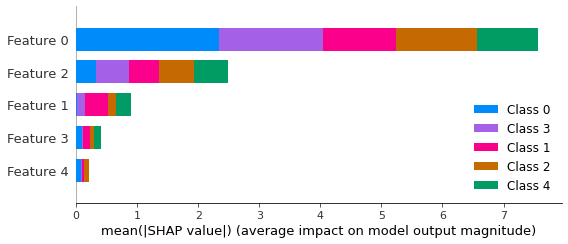

混淆矩阵:
[[27  0  0  0  0]
 [ 1 13  4  0  0]
 [ 0  0 24  0  0]
 [ 0  0  2 29  0]
 [ 0  0  0  1 11]]
准确性 (Accuracy): 0.9285714285714286
精确率 (Precision): 0.9461904761904762
召回率 (Recall): 0.9148745519713263
F1 值 (F1 Score): 0.9233516318776015
测试集真实标签： [2 2 0 1 3 4 3 2 2 4 4 0 0 2 2 0 3 1 3 3 1 2 0 2 3 0 3 0 3 1 3 1 2 2 1 0 3
 4 0 0 4 3 4 3 1 1 3 3 0 2 0 0 3 2 0 0 0 3 0 2 4 0 4 3 3 3 0 3 1 2 2 1 2 0
 0 1 3 3 3 3 2 0 3 4 1 0 2 0 1 1 2 2 4 3 3 3 1 3 1 2 2 2 0 1 4 2 3 0 1 4 0
 3]
预测标签： [2 2 0 2 3 4 2 2 2 4 4 0 0 2 2 0 3 2 3 3 2 2 0 2 3 0 3 0 3 1 3 1 2 2 1 0 3
 4 0 0 4 2 4 3 1 1 3 3 0 2 0 0 3 2 0 0 0 3 0 2 4 0 4 3 3 3 0 3 1 2 2 1 2 0
 0 1 3 3 3 3 2 0 3 4 0 0 2 0 1 1 2 2 4 3 3 3 2 3 1 2 2 2 0 1 3 2 3 0 1 4 0
 3]


In [6]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")
from classifyModel import *
XGboostClassifier(newX,Y)
#用SHAP衡量特征对最终输出值的影响